In [45]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

In [46]:
from calc import GLOSHScore

In [47]:
def plot_outliers(header, min_pts_values, data, title: str, output_file: str = "min_pts_ht.png"):
    x_len = len(data[0])
    y_len = len(min_pts_values)
    fig, ax = plt.subplots(figsize=(len(data) * 2, len(data) * 6))
    im = ax.imshow(data, vmin=0, vmax=1, cmap='plasma', interpolation="nearest", aspect=0.7)

    ax.set_xticks(range(x_len), labels=header, fontsize=18)
    ax.set_yticks(range(y_len),labels=min_pts_values, fontsize=18)
    ax.set_ylabel("min_pts", fontsize=18)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    for i in range(y_len):
        for j in range(x_len):
            val = data[i][j]
            color = "white"
            val =  f'{val:.2f}'
            text = ax.text(j, i, val,
                        ha="center", va="center", color=color, fontsize=14)


    ax.set_title(title, fontsize=20)
    fig.tight_layout()
    # plt.savefig(output_file, dpi=300,  bbox_inches='tight')

In [48]:
FILE_PATH = "/home/shukurillo/lab/OD/autoglosh-revisited/datasets/toy/toy.csv" 
data = pd.read_csv(FILE_PATH)
no_rows, _ = data.shape
header = [chr(i + 97) for i in range(no_rows)]
min_pts_values = np.arange(2, 11)

In [49]:
python_glosh_scores = []
rust_glosh_scores = []
java_glosh_scores = []


import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for min_pts in min_pts_values:
        glosh_score_calculator = GLOSHScore(
            file_path=FILE_PATH,
            min_pts=min_pts,
        )

        python_glosh_scores.append(glosh_score_calculator.calc_py_outlier_scores())
        rust_glosh_scores.append(glosh_score_calculator.calc_rust_outlier_scores())
        java_glosh_scores.append(glosh_score_calculator.calc_java_outlier_scores())

Could not evaluate outlier results, as I could not find a minority label.
Output directory specified is not empty. Files will be overwritten and old files may be left over.
Could not evaluate outlier results, as I could not find a minority label.
Output directory specified is not empty. Files will be overwritten and old files may be left over.
Could not evaluate outlier results, as I could not find a minority label.
Output directory specified is not empty. Files will be overwritten and old files may be left over.
Could not evaluate outlier results, as I could not find a minority label.
Output directory specified is not empty. Files will be overwritten and old files may be left over.
Could not evaluate outlier results, as I could not find a minority label.
Output directory specified is not empty. Files will be overwritten and old files may be left over.
Could not evaluate outlier results, as I could not find a minority label.
Output directory specified is not empty. Files will be overwr

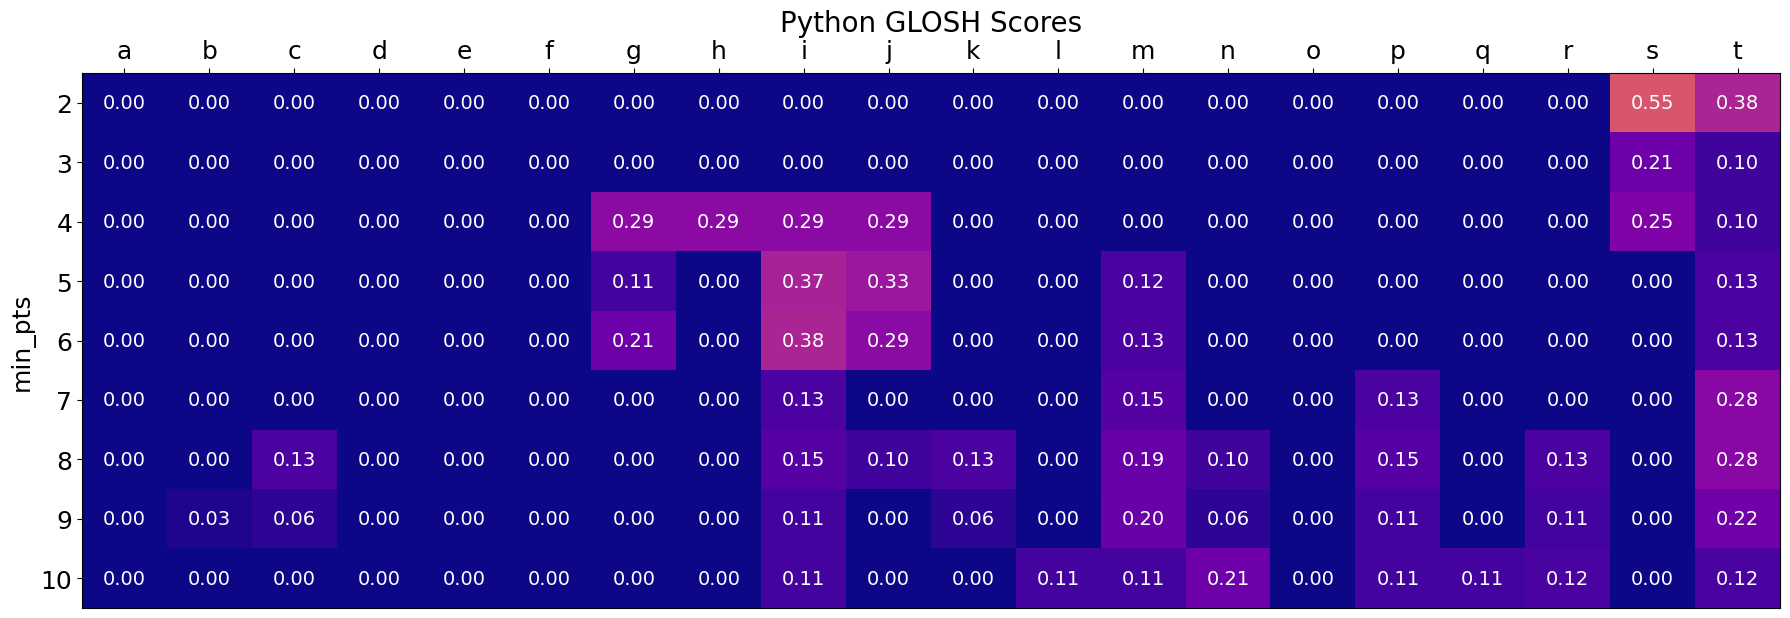

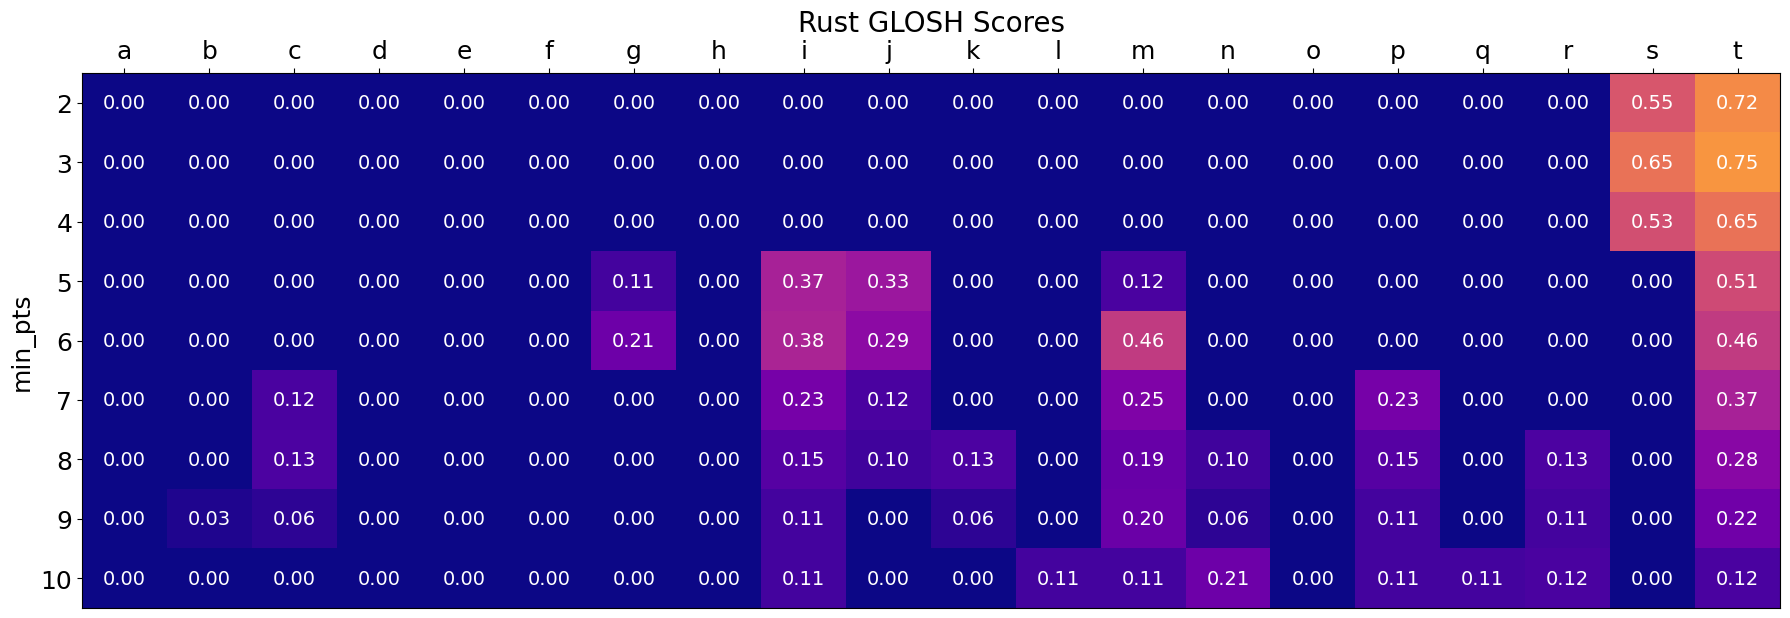

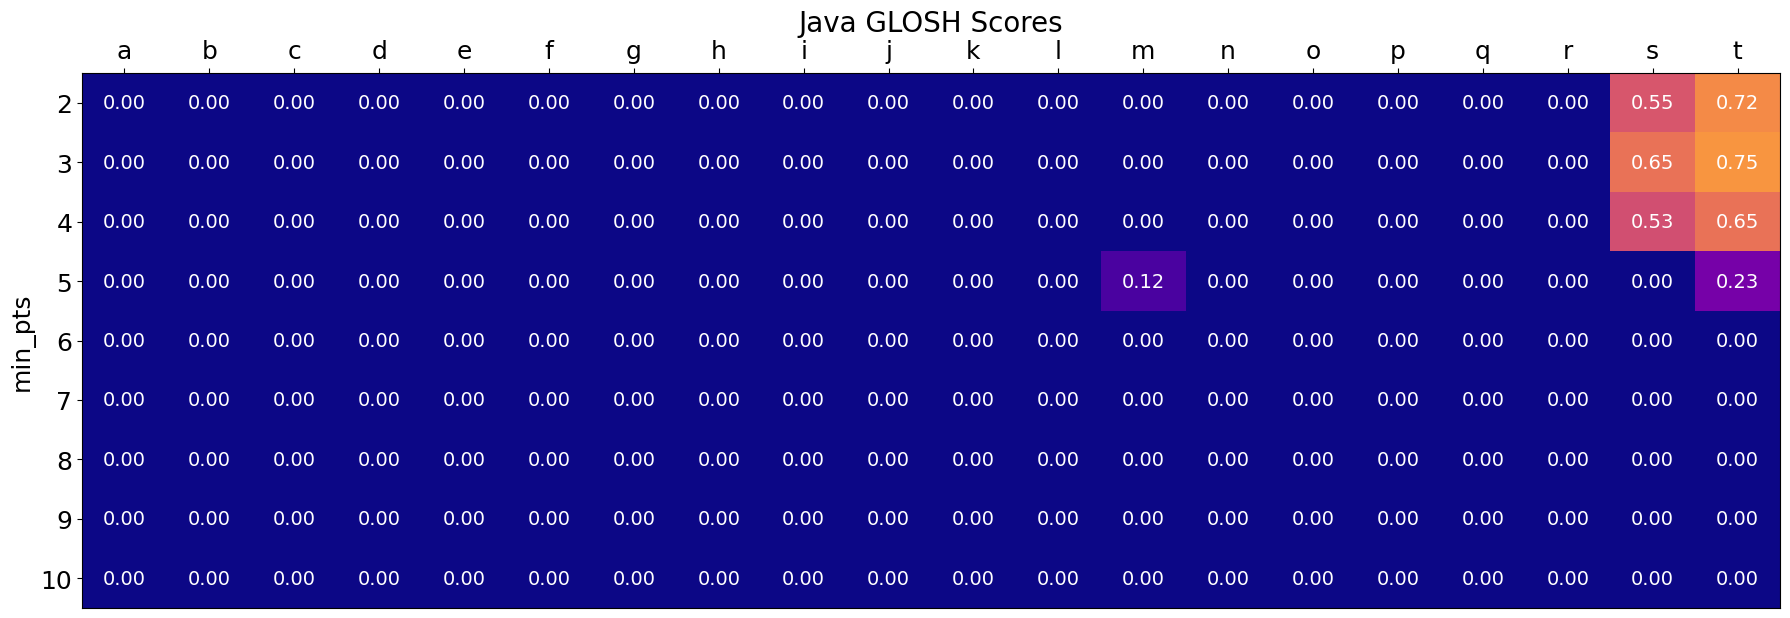

In [50]:
plot_outliers(header, min_pts_values, python_glosh_scores, "Python GLOSH Scores")
plot_outliers(header, min_pts_values, rust_glosh_scores, "Rust GLOSH Scores")
plot_outliers(header, min_pts_values,java_glosh_scores, "Java GLOSH Scores")